# 프린터

<p>일반적인 프린터는 인쇄 요청이 들어온 순서대로 인쇄합니다. 그렇기 때문에 중요한 문서가 나중에 인쇄될 수 있습니다. 이런 문제를 보완하기 위해 중요도가 높은 문서를 먼저 인쇄하는 프린터를 개발했습니다. 이 새롭게 개발한 프린터는 아래와 같은 방식으로 인쇄 작업을 수행합니다.</p>
<div class="highlight"><pre class="codehilite"><code>1. 인쇄 대기목록의 가장 앞에 있는 문서(J)를 대기목록에서 꺼냅니다.
2. 나머지 인쇄 대기목록에서 J보다 중요도가 높은 문서가 한 개라도 존재하면 J를 대기목록의 가장 마지막에 넣습니다.
3. 그렇지 않으면 J를 인쇄합니다.
</code></pre></div>
<p>예를 들어, 4개의 문서(A, B, C, D)가 순서대로 인쇄 대기목록에 있고 중요도가 2 1 3 2 라면 C D A B 순으로 인쇄하게 됩니다.</p>

<p>내가 인쇄를 요청한 문서가 몇 번째로 인쇄되는지 알고 싶습니다. 위의 예에서 C는 1번째로, A는 3번째로 인쇄됩니다.</p>

<p>현재 대기목록에 있는 문서의 중요도가 순서대로 담긴 배열 priorities와 내가 인쇄를 요청한 문서가 현재 대기목록의 어떤 위치에 있는지를 알려주는 location이 매개변수로 주어질 때, 내가 인쇄를 요청한 문서가 몇 번째로 인쇄되는지 return 하도록 solution 함수를 작성해주세요.</p>

<h5>제한사항</h5>

<ul>
<li>현재 대기목록에는 1개 이상 100개 이하의 문서가 있습니다.</li>
<li>인쇄 작업의 중요도는 1~9로 표현하며 숫자가 클수록 중요하다는 뜻입니다.</li>
<li>location은 0 이상 (현재 대기목록에 있는 작업 수 - 1) 이하의 값을 가지며 대기목록의 가장 앞에 있으면 0, 두 번째에 있으면 1로 표현합니다.</li>
</ul>

<h5>입출력 예</h5>
<table class="table">
        <thead><tr>
<th>priorities</th>
<th>location</th>
<th>return</th>
</tr>
</thead>
        <tbody><tr>
<td>[2, 1, 3, 2]</td>
<td>2</td>
<td>1</td>
</tr>
<tr>
<td>[1, 1, 9, 1, 1, 1]</td>
<td>0</td>
<td>5</td>
</tr>
</tbody>
      </table>
<h5>입출력 예 설명</h5>

<p>예제 #1</p>

<p>문제에 나온 예와 같습니다.</p>

<p>예제 #2</p>

<p>6개의 문서(A, B, C, D, E, F)가 인쇄 대기목록에 있고 중요도가 1 1 9 1 1 1 이므로 C D E F A B 순으로 인쇄합니다. </p>

<p><a href="http://www.csc.kth.se/contest/nwerc/2006/problems/nwerc06.pdf" target="_blank" rel="noopener">출처</a></p>
</div>
    </div>

  </div>

In [24]:
def solution1(priorities, location):
    count = 0 
    while True: 
        # location이 맨 마지막에 남았을 때
        if len(priorities) == 1:
            count += 1
            return count
        temp = priorities.pop(0)
        location -= 1
        max_value = max(priorities)

        # 대기열 중에서 가장 크거나 같을 때
        if max_value <= temp:
            count += 1
            # location 원소 차례일 때
            if location == -1:
                return count
        else:
            # location 원소 차례인데 아직 출력하면 안될 때
            if location == -1:
                location = len(priorities)
            # 뒤로 보내버리기
            priorities.append(temp)
solution1([2, 1, 3, 2], 3)

2

먼저 sort를 해놓고 원하는 location이 어디에 있는지 확인하면 좋을 것 같다는 생각에
다른 방법으로 풀어보았다.

1. loc_list로 입력 priorites 길이만큼의 0으로 채운 리스트를 만들고 location에 1을 넣는다.
2. max값과 max index를 뽑는다.
3. prior와 loc_list를 max값 기준으로 반으로 쪼개고 서로 위치를 바꾼다.
4. max값이 앞에 있으면 prior와 loc_list를pop으로 뺀다.
5. loc_list는 특별히 li에 append한다. 
6. 만약 prior를 다 출력했으면 li에서 1의 위치를 반환한다.
7. 6번 조건을 만족할 때까지 반복

아쉬운 거는 loc_list를 따로 메모리를 써서 만들도록 코딩을 해서
더 효율적인 풀이가 있을 것 같다.

In [25]:
def solution(priorities, location):
    loc_list = [0] * len(priorities)
    loc_list[location] = 1
    li = []
    while True:
        max_value = max(priorities)
        index = priorities.index(max_value)

        left, right = priorities[:index], priorities[index:]
        priorities = right + left
        left, right = loc_list[:index], loc_list[index:]
        loc_list = right + left
        if priorities[0] == max_value:
            priorities.pop(0)
            temp = loc_list.pop(0)
            li.append(temp)

        if len(priorities) == 0:
            return li.index(1) + 1
solution(prints, location)

4

In [63]:
import random
a = [random.randint(1, 9) for _ in range(100)]
location = random.randint(0, 99)
%timeit -n 1 -r 1 solution(a,location)
%timeit -n 1 -r 1 solution1(a,location)
# 두 번째 solution이 일반적으로 빠르다

470 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.38 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# 124나라의 숫자
<p>124 나라가 있습니다. 124 나라에서는 10진법이 아닌 다음과 같은 자신들만의 규칙으로 수를 표현합니다.</p>

<ol>
<li>124 나라에는 자연수만 존재합니다.</li>
<li>124 나라에는 모든 수를 표현할 때 1, 2, 4만 사용합니다.</li>
</ol>

<p>예를 들어서 124 나라에서 사용하는 숫자는 다음과 같이 변환됩니다.</p>
<table class="table">
        <thead><tr>
<th>10진법</th>
<th>124 나라</th>
<th>10진법</th>
<th>124 나라</th>
</tr>
</thead>
        <tbody><tr>
<td>1</td>
<td>1</td>
<td>6</td>
<td>14</td>
</tr>
<tr>
<td>2</td>
<td>2</td>
<td>7</td>
<td>21</td>
</tr>
<tr>
<td>3</td>
<td>4</td>
<td>8</td>
<td>22</td>
</tr>
<tr>
<td>4</td>
<td>11</td>
<td>9</td>
<td>24</td>
</tr>
<tr>
<td>5</td>
<td>12</td>
<td>10</td>
<td>41</td>
</tr>
</tbody>
      </table>
<p>자연수 n이 매개변수로 주어질 때, n을 124 나라에서 사용하는 숫자로 바꾼 값을 return 하도록 solution 함수를 완성해 주세요.</p>

<h5>제한사항</h5>

<ul>
<li>n은 500,000,000이하의 자연수 입니다.</li>
</ul>

<hr>

<h5>입출력 예</h5>
<table class="table">
        <thead><tr>
<th>n</th>
<th>result</th>
</tr>
</thead>
        <tbody><tr>
<td>1</td>
<td>1</td>
</tr>
<tr>
<td>2</td>
<td>2</td>
</tr>
<tr>
<td>3</td>
<td>4</td>
</tr>
<tr>
<td>4</td>
<td>11</td>
</tr>
</tbody>
      </table></div>
    </div>

  </div>
  

In [192]:
# 0부터가 아니라 1부터 시작해서 너무 헷갈린다.
# n을 입력받으면 일단 n-1부터 시키고 시작한다.
# 1. 자연수가 범위이기 때문에 꼬인다. -1 해주자
# 2. divmod는 몫과 나머지를 tuple로 반환한다. 
# 3. T에서 인덱스로 숫자를 뽑아서 변환을 해줄 것이다.
# 4. 자릿수를 높일 필요가 없으면 T에서 찾아서 변환한다.
# 5. 높여야 하면 그만큼 재귀를 하고, 나머지를 반환한다.

def sol(n):
    n -= 1
    q, r = divmod(n, 3)
    T = '124'
    if q == 0:
        return T[r]
    else:
        return sol(q) + T[r]
sol(3)

'4'

# 숫자 야구
<div class="guide-section-description">
      <h6 class="guide-section-title">문제 설명</h6>
      <div class="markdown solarized-dark"><p>숫자 야구 게임이란 2명이 서로가 생각한 숫자를 맞추는 게임입니다. <a href="https://scratch.mit.edu/projects/131352991/" title="게임해보기" target="_blank" rel="noopener">게임해보기</a></p>

<p>각자 서로 다른 1~9까지 3자리 임의의 숫자를 정한 뒤 서로에게 3자리의 숫자를 불러서 결과를 확인합니다. 그리고 그 결과를 토대로 상대가 정한 숫자를 예상한 뒤 맞힙니다.</p>
<div class="highlight"><pre class="codehilite"><code>* 숫자는 맞지만, 위치가 틀렸을 때는 볼
* 숫자와 위치가 모두 맞을 때는 스트라이크
* 숫자와 위치가 모두 틀렸을 때는 아웃
</code></pre></div>
<p>예를 들어, 아래의 경우가 있으면</p>
<div class="highlight"><pre class="codehilite"><code>A : 123
B : 1스트라이크 1볼.
A : 356
B : 1스트라이크 0볼.
A : 327
B : 2스트라이크 0볼.
A : 489
B : 0스트라이크 1볼.
</code></pre></div>
<p>이때 가능한 답은 324와 328 두 가지입니다.</p>

<p>질문한 세 자리의 수, 스트라이크의 수, 볼의 수를 담은 2차원 배열 baseball이 매개변수로 주어질 때, 가능한 답의 개수를 return 하도록 solution 함수를 작성해주세요.</p>

<h5>제한사항</h5>

<ul>
<li>질문의 수는 1 이상 100 이하의 자연수입니다.</li>
<li>baseball의 각 행은 [세 자리의 수, 스트라이크의 수, 볼의 수] 를 담고 있습니다.</li>
</ul>

<h5>입출력 예</h5>
<table class="table">
        <thead><tr>
<th>baseball</th>
<th>return</th>
</tr>
</thead>
        <tbody><tr>
<td>[[123, 1, 1], [356, 1, 0], [327, 2, 0], [489, 0, 1]]</td>
<td>2</td>
</tr>
</tbody>
      </table>
<h5>입출력 예 설명</h5>

<p>문제에 나온 예와 같습니다.</p>

<p><a href="https://www.digitalculture.or.kr/koi/selectOlymPiadDissentList.do" target="_blank" rel="noopener">출처</a></p>
</div>
    </div>

123,1,1

102
130
320
021
203
013

345, 1, 0
3 ㅅㅌ - 4 ㅇㅇ, 5 ㅇㅇ
4 ㅅㅌ - 3 ㅇㅇ, 5 ㅇㅇ
5 ㅅㅌ - 3 ㅇㅇ, 4 ㅇㅇ

327, 2, 0
320
307
027


489, 0, 1
4 ㅂ - 8 ㅇㅇ, 9 ㅇㅇ
8 ㅂ - 4 ㅇㅇ, 9 ㅇㅇ
9 ㅂ - 4 ㅇㅇ, 8 ㅇㅇ


12345689

In [298]:
def checkScore(num, case):
    strike = 0
    ball = 0
    for i, e in enumerate(num):
        if e == case[i]:
            strike += 1
        elif e in case:
            ball += 1
    return strike, ball

nums = list(map(str, range(1,10)))
# 모든 숫자 경우의 수 
all_cases = [ ''.join(i) for i in permutations(nums, 3) ]
# x = [[123, 1, 1], [356, 1, 0], [327, 2, 0], [489, 0, 1]]
x = [[123, 1, 1], [356, 1, 0], [327, 2, 0], [489, 0, 1]]
for n, s, b in x:
    new_cases = []
    for c in all_cases:
        if checkScore(str(n), c) == (s, b):
            new_cases.append(c)
            all_cases = new_cases
            print(all_cases)
print(len(all_cases))

['134']
['134', '135']
['134', '135', '136']
['134', '135', '136', '137']
['134', '135', '136', '137', '138']
['134', '135', '136', '137', '138', '139']
['134', '135', '136', '137', '138', '139', '142']
['134', '135', '136', '137', '138', '139', '142', '152']
['134', '135', '136', '137', '138', '139', '142', '152', '162']
['134', '135', '136', '137', '138', '139', '142', '152', '162', '172']
['134', '135', '136', '137', '138', '139', '142', '152', '162', '172', '182']
['134', '135', '136', '137', '138', '139', '142', '152', '162', '172', '182', '192']
['134', '135', '136', '137', '138', '139', '142', '152', '162', '172', '182', '192', '243']
['134', '135', '136', '137', '138', '139', '142', '152', '162', '172', '182', '192', '243', '253']
['134', '135', '136', '137', '138', '139', '142', '152', '162', '172', '182', '192', '243', '253', '263']
['134', '135', '136', '137', '138', '139', '142', '152', '162', '172', '182', '192', '243', '253', '263', '273']
['134', '135', '136', '137', '13

In [1]:
# 1. 미리 모든 케이스를 만들어 놓는다
# 2. 숫자와 스트라이크, 볼이 입력된다.
# 3. 먼저 숫자와 모든 케이스를 비교해서 스트라이크와 볼을 미리 구해놓는다.
# 4. 같이 입력된 스트라이크와 볼이 미리 구해놓은 점수와 같다면 new case에 넣는다
# 5. new case를 all case로 바꾸고 2번으로 돌아가서 반복
from itertools import permutations
    # 숫자와 기존 case 하나를 비교
def checkScore(num, case):
    strike = 0
    ball = 0
    for i, e in enumerate(num):
        # 한 자리씩 비교해서 같으면 스트라이크
        if e == case[i]:
            strike += 1
        # 위치는 다르지만 존재하면 볼
        elif e in case:
            ball += 1
    return strike, ball

def solution(baseball):
    # baseball = 2d list
    # 모든 숫자 경우의 수 
    all_cases = [ ''.join(i) for i in permutations(list(map(str, range(1,10))), 3) ]
    # 숫자, 스트라이크, 볼
    for n, s, b in baseball:
        # 조건을 만족하는 숫자가 담길 리스트
        new_cases = []
        for c in all_cases:
            if checkScore(str(n), c) == (s, b):
                new_cases.append(c)
                all_cases = new_cases
    answer = len(all_cases)
    return answer


x = [[123, 1, 1], [356, 1, 0], [327, 2, 0], [489, 0, 1]]
solution(x)

2

# 원주율 외우기
가끔 TV 에 보면 원주율을 몇만 자리까지 줄줄 외우는 신동들이 등장하곤 합니다. 이들이 이 수를 외우기 위해 사용하는 방법 중 하나로, 숫자를 몇 자리 이상 끊어 외우는 것이 있습니다. 이들은 숫자를 세 자리에서 다섯 자리까지로 끊어서 외우는데, 가능하면 55555 나 123 같이 외우기 쉬운 조각들이 많이 등장하는 방법을 택하곤 합니다.

이 때, 각 조각들의 난이도는 다음과 같이 정해집니다:

1. 모든 숫자가 같을 때 (예: 333, 5555) 난이도: 1
2. 숫자가 1씩 단조 증가하거나 단조 감소할 때 (예: 23456, 3210) 난이도: 2
3. 두 개의 숫자가 번갈아 가며 출현할 때 (예: 323, 54545) 난이도: 4
4. 숫자가 등차 수열을 이룰 때 (예: 147, 8642) 난이도: 5
5. 그 외의 경우 난이도: 10

원주율의 일부가 입력으로 주어질 때, 난이도의 합을 최소화하도록 숫자들을 3자리에서 5자리까지 끊어 읽고 싶습니다. 최소의 난이도를 계산하는 프로그램을 작성하세요.

#### 입력
입력의 첫 줄에는 테스트 케이스의 수 C (<= 50) 가 주어집니다. 각 테스트 케이스는 8글자 이상 10000글자 이하의 숫자로 주어집니다.

#### 출력
각 테스트 케이스마다 한 줄에 최소의 난이도를 출력합니다.

#### 예제 입력
5 \
12341234 \
11111222 \
12122222 \
22222222 \
12673939 
#### 예제 출력
4\
2\
5\
2\
14

한 조각의 길이는 3, 4, 5 중 하나이다.
각 3개의 부분문제의 최적해를 구했다고 치자
전체 문제의 최적해는 다음 3 경우 중 가장 작은 값이 된다.

- 길이 3인조각의 난이도 + 3글자빼고나머지 수열에 대한죄적해 
- 길이 4인조각의 난이도 + 4글자빼고나머지 수열에 대한최적해 
- 길이 5인조각의 난이도 + 5글자 빼고나머지 수열에 대한최적해 

나머지 수열의 최적해를 구할 때 앞의 부분은 신경 쓸 필요가 없다. 따라서 부분 수열의 시작위치 begin이 주어졌을 때 최소 난이도를 메모이제이션으로 반환하면 된다.

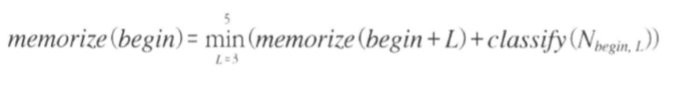

N[begin : begin + L]이라는 부분 문자열을 classify로 난이도를 반환한다.
beigin값이 같을 때 하상 같은 값을 반환하므로 메모이제이션을 사용할 수 있다.


In [8]:
def classify(start, end):
    # 부분 수열
    sub = string[start:end+1]
    # 난이도 1?
    if all(sub[0] == i for i in sub):
        return 1
    
    # 등차수열?
    flag = True
    diff = sub[1] - sub[0]
    for i in range(len(sub) - 1):
        if sub[i+1] - sub[i] != diff:
            flag = False
            break
    else:
        # 난이도 2?
        # for else문 통과하고 공차가 1또는 -1이면 난이도 2
        if abs(diff) == 1:
            return 2

    flag2 = True
    for i in range(len(sub)):
        if sub[i] != sub[i % 2]:
            flag2 = False
            break
    if flag2:
        return 4
    if flag:
        return 5
    return 10  

# 부분수열 N[start]에서 최소 합 출력
def solution(start):
    # basis : 수열의 끝
    if start == len(string):
        return 0
    # 메모이제이션
    if cache[start] != -1:
        return cache[start]    
    ret = 10 ** 8
    for i in range(3,6):
        if start + i <= len(string):
            ret = min(ret, solution(start + i) + classify(start, start+i-1))
    return ret

for _ in range(int(input())):
    cache = [-1] * 10002
    string = list(map(int, list(input().strip())))
    print(solution(0))

1
12341234
4


In [9]:
import random
# for _ in range(3):
cache = [-1] * 10002
string = [1 for _ in range(100)]
%timeit -n 1 -r 1 solution(0)

KeyboardInterrupt: 